In [90]:
import pandas as pd

data = {
    'mother_height': [58, 62, 60, 64, 67, 70],
    'daughter_height': [60, 60, 58, 60, 70, 72]
}

df = pd.DataFrame(data)
df.to_csv('heights.csv', index=False)

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
df = pd.read_csv('heights.csv')
X = df['mother_height'].values.reshape(-1, 1) 
y = df['daughter_height'].values
X_with_intercept = np.c_[np.ones(X.shape[0]), X]  
b = np.zeros(X_with_intercept.shape[1])  
learning_rate = 0.0001
epochs = 4
iterations_per_epoch = 6
total_iterations = epochs * iterations_per_epoch
m = len(y)


In [92]:
X

array([[58],
       [62],
       [60],
       [64],
       [67],
       [70]])

In [93]:
b

array([0., 0.])

In [94]:
X@b

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2 is different from 1)

In [95]:
def compute_cost(X, y, b):
    predictions = X.dot(b)
    return (1 / (2 * m)) * np.sum(np.square(predictions - y))

In [96]:
def stochastic_gradient_descent(X, y, b, learning_rate, total_iterations):
    costs = []
    for _ in range(total_iterations):
        indices = np.arange(m)
        np.random.shuffle(indices)
        
        for i in indices:
            xi = X[i:i+1] 
            yi = y[i:i+1]
            prediction = xi.dot(b)
            error = prediction - yi
            b[0] -= learning_rate * error  
            b[1] -= learning_rate * error * xi[0, 1]  
        cost = compute_cost(X, y, b)
        costs.append(cost)
        e.append(error)
    
    return b, costs


In [97]:
b, costs = stochastic_gradient_descent(X_with_intercept, y, b, learning_rate, total_iterations)
print(f'Optimal parameters (b) from SGD: {b}')


Optimal parameters (b) from SGD: [0.01492765 0.98813242]


/tmp/ipykernel_19217/3246321103.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  b[0] -= learning_rate * error
/tmp/ipykernel_19217/3246321103.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  b[1] -= learning_rate * error * xi[0, 1]


In [98]:
model = LinearRegression()
model.fit(X, y)
sklearn_b = np.r_[model.intercept_, model.coef_[0]]  # Include intercept term

print(f'Optimal parameters (b) from sklearn: {sklearn_b}')

Optimal parameters (b) from sklearn: [-13.24958124   1.20603015]


MSE: 7.216167167543271
RMSE: 2.686292457559912


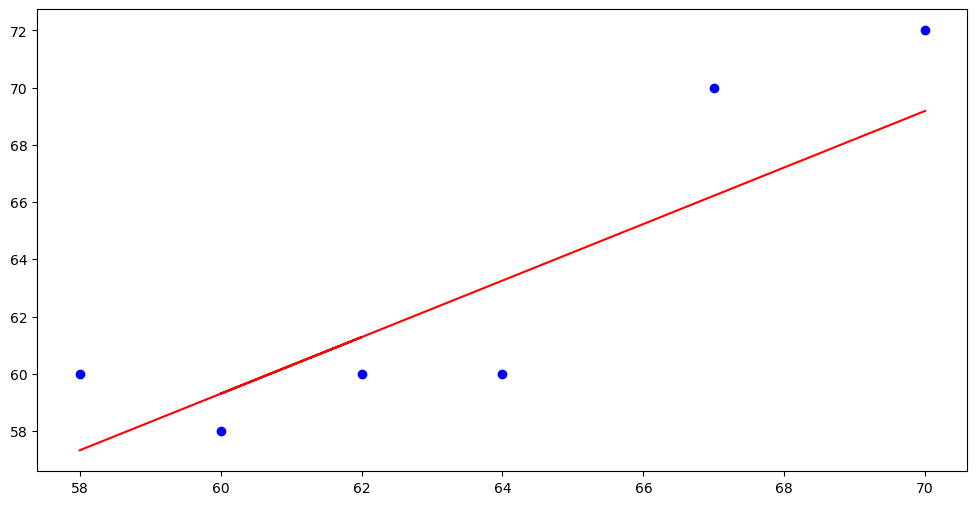

In [99]:
y_pred = X_with_intercept.dot(b)
mse = mean_squared_error(y, y_pred)
rmse = sqrt(mse)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

# Plot Daughter height vs Mother height and the line of best fit
plt.figure(figsize=(12, 6))

# Plot data points
plt.scatter(X, y, color='blue', label='Data Points')

# Plot the line of best fit from SGD
plt.plot(X, X_with_intercept.dot(b), color='red', label='Line of Best Fit (SGD)')


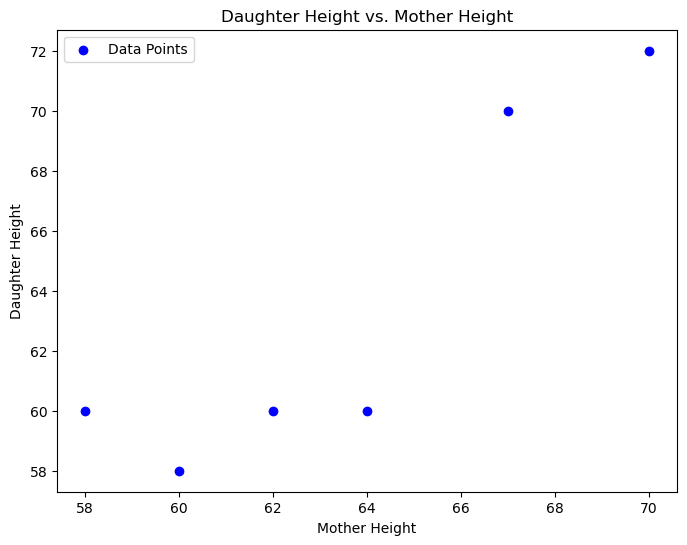

In [100]:
plt.figure(figsize=(8, 6))
plt.scatter(df['mother_height'], df['daughter_height'], color='blue', label='Data Points')

# Adding labels and title
plt.xlabel('Mother Height')
plt.ylabel('Daughter Height')
plt.title('Daughter Height vs. Mother Height')
plt.legend()

# Show the plot
plt.show()


In [101]:
new_mother_height = 63
new_X = np.array([[1, new_mother_height]])  # Adding intercept term
predicted_daughter_height = new_X.dot(b)
print(f'Predicted daughter height for mother height {new_mother_height}: {predicted_daughter_height[0]}')

Predicted daughter height for mother height 63: 62.267269864820285


In [102]:
plt.plot(itera)

NameError: name 'itera' is not defined

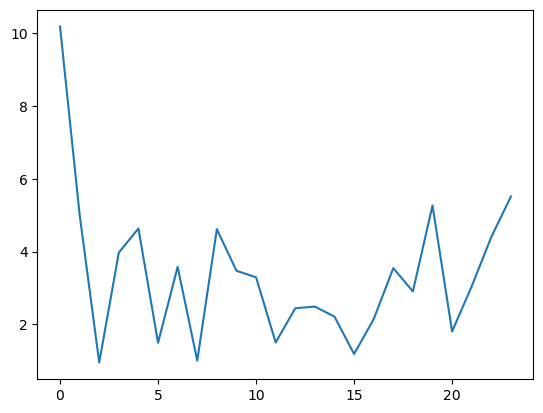

In [103]:
x=np.arange(24)
y=abs(np.array(e))
plt.plot(x,y)
plt.show()

In [104]:
y

array([[10.19285232],
       [ 5.01569455],
       [ 0.94721644],
       [ 3.97120776],
       [ 4.63423985],
       [ 1.48919405],
       [ 3.57935389],
       [ 0.99892954],
       [ 4.61527867],
       [ 3.47029167],
       [ 3.29135141],
       [ 1.49702437],
       [ 2.43955486],
       [ 2.48490487],
       [ 2.20997149],
       [ 1.18011289],
       [ 2.13959915],
       [ 3.54314948],
       [ 2.90333716],
       [ 5.26776947],
       [ 1.80133478],
       [ 3.04350001],
       [ 4.40093868],
       [ 5.51482684]])